In [7]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Conv2DTranspose
from keras.utils import np_utils

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [3]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
x = Input(shape=(28, 28,1))
res0 = x

# Encoder
conv1_1 = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
conv1_2 = Conv2D(96, (3, 3), activation='relu', padding='same')(conv1_1)
res1 = conv1_2
conv1_3 = Conv2D(96, (3, 3), activation='relu', padding='same')(conv1_2)
conv1_4 = Conv2D(96, (3, 3), activation='relu', padding='same')(conv1_3)
res2 = conv1_4
conv1_5 = Conv2D(96, (3, 3), activation='relu', padding='same')(conv1_4)

# Decoder
conv2_1 = Conv2DTranspose(96, (3, 3), padding='same')(conv1_5)
conv2_1_add = Add()([res2, conv2_1])
conv2_1_add = Activation('relu')(conv2_1_add)

conv2_2 = Conv2DTranspose(96, (3, 3), activation='relu', padding='same')(conv2_1_add)
conv2_3 = Conv2DTranspose(96, (3, 3), padding='same')(conv2_2)
conv2_3_add = Add()([res1, conv2_3])
conv2_3_add = Activation('relu')(conv2_3_add)

conv2_4 = Conv2DTranspose(96, (3, 3), activation='relu', padding='same')(conv2_3_add)
conv2_5 = Conv2DTranspose(1, (3, 3), padding='same')(conv2_4)
conv2_5_add = Add()([res0, conv2_5])
out = Activation('relu')(conv2_5_add)

autoencoder = Model(inputs=x, outputs=out)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


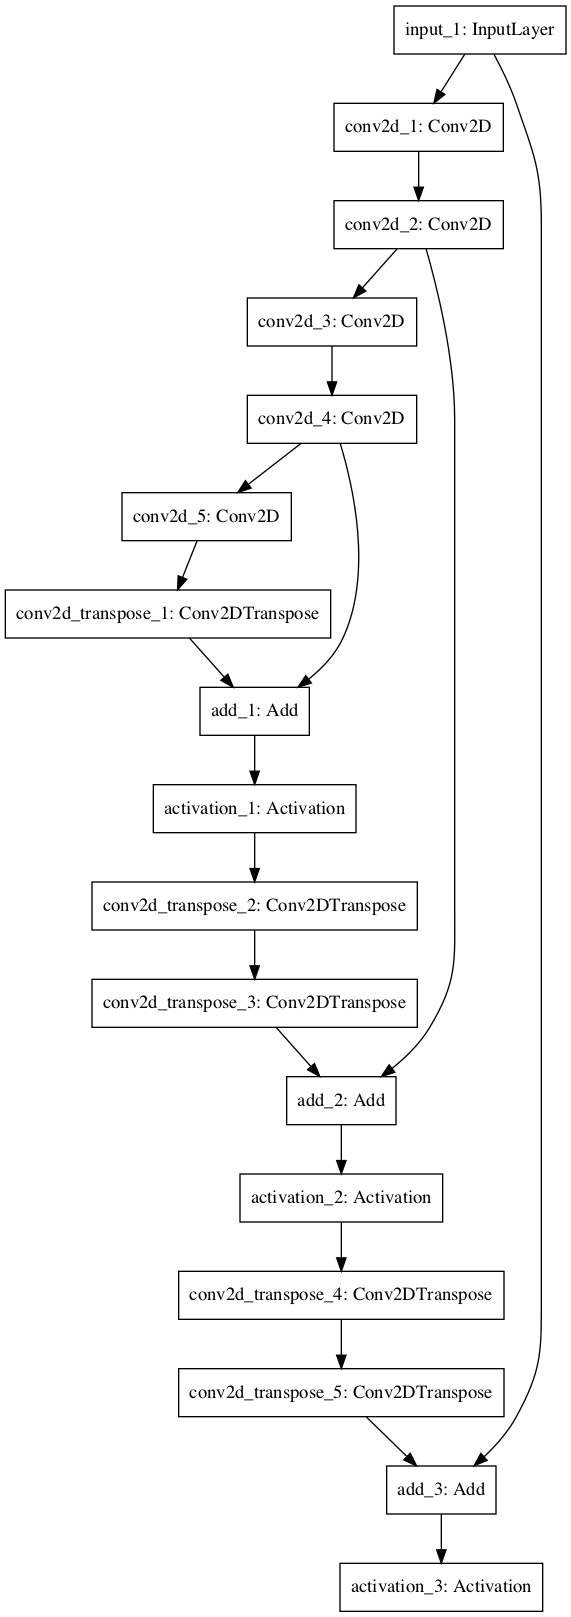

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
plot_model(autoencoder, dpi=96, to_file='model.png')
#SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [12]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 1664/60000 [..............................] - ETA: 42:03 - loss: 0.0616

KeyboardInterrupt: 